In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from pandas.tseries.offsets import BQuarterEnd
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore') #

In [2]:
fund_sparsity_prepared = pd.read_csv('2024_04_11_fund_sparisty.csv')

#### Remove MSCI EAFE NR USD for the passive measures and remove top 5 percentile for other measures

In [3]:
fund_sparsity_prepared.columns

Index(['wficn', 'quarter', 'prim_prospectus_bm', 'percent_within_3',
       'if_past_quarter_missing_3', 'percent_within_7',
       'if_past_quarter_missing_7', 'percent_within_11',
       'if_past_quarter_missing_11', 'percent_within_15',
       'if_past_quarter_missing_15', 'percent_within_19',
       'if_past_quarter_missing_19', 'percent_benchmark_0',
       'percent_benchmark_3', 'percent_benchmark_7', 'percent_benchmark_11',
       'percent_benchmark_15', 'percent_benchmark_19',
       'percent_benchmark_median_passive', 'percent_benchmark_avg_passive',
       'percent_benchmark_largest_passive'],
      dtype='object')

In [4]:
fund_sparsity_prepared.loc[fund_sparsity_prepared['prim_prospectus_bm'] == 'MSCI EAFE NR USD', ['percent_benchmark_median_passive', 'percent_benchmark_avg_passive', 'percent_benchmark_largest_passive']] = np.nan

In [5]:
# Assuming fund_sparsity is your DataFrame
columns_to_process = [
    'percent_benchmark_3', 'percent_benchmark_7', 'percent_benchmark_11',
    'percent_benchmark_15', 'percent_benchmark_19', 'percent_benchmark_median_passive',
    'percent_benchmark_avg_passive', 'percent_benchmark_largest_passive', 'percent_benchmark_0',
    'percent_within_3', 'percent_within_7', 'percent_within_11',
    'percent_within_15', 'percent_within_19'
]

def replace_top_5_percentile(group):
    # For each column to process, replace top 5 percentile values with NaN
    for column in columns_to_process:
        # Calculate the 95th percentile value for the current column
        percentile_95 = group[column].quantile(0.95)
        # Replace values greater than the 95th percentile with NaN
        group.loc[group[column] > percentile_95, column] = np.nan
    return group

# Group the DataFrame by 'quarter' and apply the replacement function
fund_sparsity_prepared = fund_sparsity_prepared.groupby('quarter').apply(replace_top_5_percentile)
# Now fund_sparsity_updated contains the updated DataFrame
fund_sparsity_prepared = fund_sparsity_prepared.drop(columns=['quarter']).reset_index().drop(columns=['level_1'])

In [6]:
fund_sparsity_prepared

,quarter,wficn,prim_prospectus_bm,percent_within_3,if_past_quarter_missing_3,percent_within_7,if_past_quarter_missing_7,percent_within_11,if_past_quarter_missing_11,percent_within_15,if_past_quarter_missing_15,percent_within_19,if_past_quarter_missing_19,percent_benchmark_0,percent_benchmark_3,percent_benchmark_7,percent_benchmark_11,percent_benchmark_15,percent_benchmark_19,percent_benchmark_median_passive,percent_benchmark_avg_passive,percent_benchmark_largest_passive
0,1980Q1,100010.0,NaN,1.000000,1,1.000000,1,1.000000,1,1.000000,1,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980Q1,100019.0,NaN,1.000000,1,1.000000,1,1.000000,1,1.000000,1,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980Q1,100036.0,NaN,1.000000,1,1.000000,1,1.000000,1,1.000000,1,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980Q1,100046.0,NaN,1.000000,1,1.000000,1,1.000000,1,1.000000,1,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980Q1,100055.0,NaN,1.000000,1,1.000000,1,1.000000,1,1.000000,1,1.000000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425641,2020Q3,605142.0,NaN,0.843972,0,0.672316,0,0.604061,0,0.533632,0,0.512931,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425642,2020Q3,605143.0,NaN,0.870968,0,0.843750,0,0.771429,0,0.771429,0,0.750000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425643,2020Q3,605146.0,S&P 500 TR USD,0.529412,0,0.473684,0,0.391304,0,0.360000,0,0.333333,0,0.00218,0.002088,0.002036,0.001992,0.001956,0.001939,0.018,0.018322,0.017893
425644,2020Q3,605147.0,NaN,0.654867,0,0.592000,0,0.503401,0,0.448485,0,0.391534,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Fund Existence

In [7]:
fund_sparsity_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425646 entries, 0 to 425645
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   quarter                            425646 non-null  object 
 1   wficn                              425646 non-null  float64
 2   prim_prospectus_bm                 145457 non-null  object 
 3   percent_within_3                   424581 non-null  float64
 4   if_past_quarter_missing_3          425646 non-null  int64  
 5   percent_within_7                   417914 non-null  float64
 6   if_past_quarter_missing_7          425646 non-null  int64  
 7   percent_within_11                  415561 non-null  float64
 8   if_past_quarter_missing_11         425646 non-null  int64  
 9   percent_within_15                  414317 non-null  float64
 10  if_past_quarter_missing_15         425646 non-null  int64  
 11  percent_within_19                  4140

In [8]:
fund_sparsity_prepared['count'] = 1
fund_exist_quarters = fund_sparsity_prepared.groupby('wficn')['count'].sum()
fund_exist_array = np.array(fund_exist_quarters)

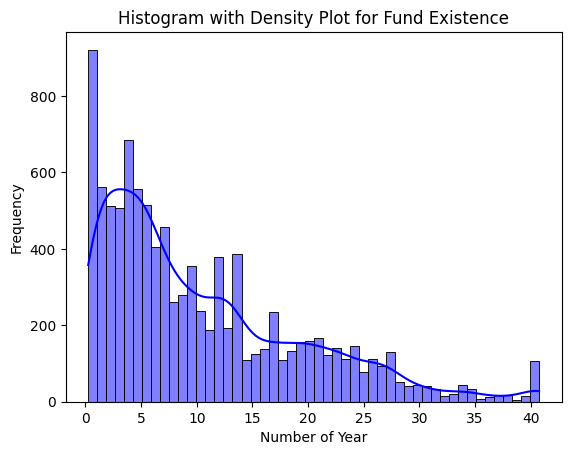

In [9]:
# Plot a histogram with a density curve
sns.histplot(fund_exist_array/4, kde=True, color='blue', bins=50)

# Set the titles and labels
plt.title('Histogram with Density Plot for Fund Existence')
plt.xlabel('Number of Year')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [10]:
# Convert the boolean column to integers (1 for True, 0 for False)
fund_sparsity_prepared['if_greater_3yr'] = (fund_sparsity_prepared['wficn'].map(fund_exist_quarters) > 12).astype(int)
# Map the count of quarters directly to a new column in the original dataframe
fund_sparsity_prepared['quarters_existed'] = fund_sparsity_prepared['wficn'].map(fund_exist_quarters)

In [11]:
fund_sparsity_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425646 entries, 0 to 425645
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   quarter                            425646 non-null  object 
 1   wficn                              425646 non-null  float64
 2   prim_prospectus_bm                 145457 non-null  object 
 3   percent_within_3                   424581 non-null  float64
 4   if_past_quarter_missing_3          425646 non-null  int64  
 5   percent_within_7                   417914 non-null  float64
 6   if_past_quarter_missing_7          425646 non-null  int64  
 7   percent_within_11                  415561 non-null  float64
 8   if_past_quarter_missing_11         425646 non-null  int64  
 9   percent_within_15                  414317 non-null  float64
 10  if_past_quarter_missing_15         425646 non-null  int64  
 11  percent_within_19                  4140

#### 

#### mf_monthly_returns Aggregate to Quaterly return

In [12]:
mf_monthly_returns = pd.read_stata('mf_monthly_returns.dta')

In [13]:
mf_monthly_returns['mret_one'] = mf_monthly_returns['mret']+1
# Step 1: Convert `caldt` to datetime format
mf_monthly_returns['caldt'] = pd.to_datetime(mf_monthly_returns['caldt'])

# Step 2: Extract year and quarter
mf_monthly_returns['year'] = mf_monthly_returns['caldt'].dt.year
mf_monthly_returns['quarter'] = mf_monthly_returns['caldt'].dt.quarter

# Combine year and quarter for easier grouping
mf_monthly_returns['year_quarter'] = mf_monthly_returns['year'].astype(str) + 'Q' + mf_monthly_returns['quarter'].astype(str)

grouped = mf_monthly_returns.groupby(['crsp_fundno', 'year_quarter'])['mret_one'].prod()

# Step 5: Subtract 1 from the product to get the quarterly return
quarterly_mf_returns = grouped - 1

# The result is a Series with multi-level index (`crsp_fundno`, `year_quarter`)
# containing the aggregated quarterly returns. You might want to reset the index to make it a dataframe:
quarterly_mf_returns = quarterly_mf_returns.reset_index(name='quarterly_return')

wficn_crspno = pd.read_stata('matched_fundno_fundName_wficn_11-27-23.dta')

wficn_crspno = wficn_crspno[['crsp_fundno','wficn']]

merged_mf_returns = quarterly_mf_returns.merge(wficn_crspno[['crsp_fundno','wficn']],on='crsp_fundno')

merged_mf_returns =merged_mf_returns.drop_duplicates(subset=['wficn', 'year_quarter'])

# Rename the columns in quarterly_mf_returns
merged_mf_returns.rename(columns={ 'year_quarter': 'quarter', 
                                     'quarterly_return': 'fund_ret'}, inplace=True)

#### ff_factors Aggregate to quarterly

In [14]:
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv')
ff_factors = ff_factors.iloc[:1171,:]

In [15]:
# Convert 'date' to datetime format to extract year and quarter
ff_factors['date'] = pd.to_datetime(ff_factors['date'].astype(str), format='%Y%m')
ff_factors['quarter'] = ff_factors['date'].dt.to_period('Q')
# Convert the financial factor columns to numeric types to ensure proper aggregation
ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']] = ff_factors[['Mkt-RF', 'SMB', 'HML', 'RF']].apply(pd.to_numeric, errors='coerce')
# Select only the columns we want to aggregate
columns_to_aggregate = ['Mkt-RF', 'SMB', 'HML', 'RF']

# Perform the aggregation, explicitly selecting the columns
quarterly_ff = ff_factors.groupby('quarter')[columns_to_aggregate].sum().reset_index()

#### Merge fund_sparsity_prepared /quarterly_mf_returns/quarterly_ff

In [16]:
fund_sparsity_prepared['quarter'] = pd.to_datetime(fund_sparsity_prepared['quarter']).dt.to_period('Q').astype(str)
merged_df = pd.merge(fund_sparsity_prepared,merged_mf_returns, on=['wficn', 'quarter'], how='left')
# Convert 'quarter' in merged_df from object to period[Q-DEC]
merged_df['quarter'] = pd.to_datetime(merged_df['quarter']).dt.to_period('Q')
final_merged_df = pd.merge(merged_df,quarterly_ff, on=['quarter'],how='left')
# Convert the 'quarter' column from period[Q-DEC] to string
final_merged_df['quarter'] = final_merged_df['quarter'].astype(str)

In [17]:
final_merged_df.describe().round(4) 

,wficn,percent_within_3,if_past_quarter_missing_3,percent_within_7,if_past_quarter_missing_7,percent_within_11,if_past_quarter_missing_11,percent_within_15,if_past_quarter_missing_15,percent_within_19,if_past_quarter_missing_19,percent_benchmark_0,percent_benchmark_3,percent_benchmark_7,percent_benchmark_11,percent_benchmark_15,percent_benchmark_19,percent_benchmark_median_passive,percent_benchmark_avg_passive,percent_benchmark_largest_passive,count,if_greater_3yr,quarters_existed,crsp_fundno,fund_ret,Mkt-RF,SMB,HML,RF
count,425646.0000,424581.0000,425646.0000,417914.0000,425646.0000,415561.0000,425646.0000,414317.0000,425646.0000,414081.0000,425646.0000,138193.0000,138200.0000,138201.0000,138197.0000,138203.0000,138209.0000,121683.0000,121546.0000,121640.0000,425646.0,425646.0000,425646.0000,425646.0000,425646.0000,425646.0000,425646.0000,425646.0000,425646.0000
mean,279737.8693,0.7635,0.0898,0.6333,0.1894,0.5662,0.2772,0.5253,0.3553,0.4988,0.4248,0.0402,0.0350,0.0321,0.0304,0.0294,0.0287,0.1948,0.1949,0.1948,1.0,0.9673,73.1566,23314.5603,0.0217,1.9803,0.3346,-0.0627,0.5622
std,191872.4656,0.1730,0.2859,0.2081,0.3918,0.2220,0.4476,0.2295,0.4786,0.2349,0.4943,0.0388,0.0341,0.0314,0.0300,0.0291,0.0286,0.2234,0.2205,0.2276,0.0,0.1779,40.0863,16573.5517,0.1900,8.6927,4.6030,6.4679,0.5888
min,100001.0000,0.0015,0.0000,0.0013,0.0000,0.0005,0.0000,0.0004,0.0000,0.0004,0.0000,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0005,0.0005,0.0005,1.0,0.0000,1.0000,2.0000,-0.9893,-24.2000,-10.5100,-23.9300,0.0000
25%,103151.0000,0.6528,0.0000,0.4828,0.0000,0.4000,0.0000,0.3484,0.0000,0.3171,0.0000,0.0136,0.0121,0.0114,0.0110,0.0107,0.0105,0.0700,0.0699,0.0697,1.0,1.0000,40.0000,11360.0000,-0.0195,-1.4800,-2.5300,-3.8200,0.0300
50%,200297.0000,0.7807,0.0000,0.6250,0.0000,0.5417,0.0000,0.4940,0.0000,0.4579,0.0000,0.0272,0.0237,0.0217,0.0206,0.0199,0.0194,0.1136,0.1151,0.1127,1.0,1.0000,71.0000,20270.0000,0.0272,3.1500,0.4100,0.2700,0.4000
75%,500334.7500,0.9024,0.0000,0.7917,0.0000,0.7273,1.0000,0.6867,1.0000,0.6650,1.0000,0.0521,0.0445,0.0401,0.0376,0.0360,0.0349,0.2107,0.2146,0.2068,1.0,1.0000,101.0000,30515.0000,0.0729,6.6900,3.0700,2.5600,1.1100
max,605153.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.6300,1.6647,1.7309,1.0,1.0000,163.0000,96583.0000,100.7079,21.6900,11.7500,25.6200,3.7600


In [18]:
#Now save the DataFrame to a Stata file
#final_merged_df.to_stata('2024_04_12_fund_sparisty_ret.dta')

## 3.1 Cross-Sectional Analysis

In [19]:
ff_factors = pd.read_csv('F-F_Research_Data_Factors.csv')
ff_factors = ff_factors.iloc[:1171,:]

In [20]:
mf_monthly_returns = pd.read_stata('mf_monthly_returns.dta')
mf_monthly_returns['mret_one'] = mf_monthly_returns['mret']+1
# Step 1: Convert `caldt` to datetime format
mf_monthly_returns['caldt'] = pd.to_datetime(mf_monthly_returns['caldt'])

# Step 2: Extract year and quarter
mf_monthly_returns['year'] = mf_monthly_returns['caldt'].dt.year
mf_monthly_returns['quarter'] = mf_monthly_returns['caldt'].dt.quarter

# Combine year and quarter for easier grouping
mf_monthly_returns['year_quarter'] = mf_monthly_returns['year'].astype(str) + 'Q' + mf_monthly_returns['quarter'].astype(str)

wficn_crspno = pd.read_stata('matched_fundno_fundName_wficn_11-27-23.dta')

wficn_crspno = wficn_crspno[['crsp_fundno','wficn']]

merged_mf_returns = mf_monthly_returns.merge(wficn_crspno[['crsp_fundno','wficn']],on='crsp_fundno')

In [21]:
merged_mf_returns = merged_mf_returns.drop_duplicates()
merged_mf_returns = merged_mf_returns.drop(columns=['year','quarter'])
merged_mf_returns = merged_mf_returns.rename(columns={'year_quarter': 'quarter'})

In [22]:
monthly_ret_si = pd.merge(merged_mf_returns,final_merged_df, on=['quarter','wficn'],how='inner')
monthly_ret_si_3yr = monthly_ret_si[monthly_ret_si['if_greater_3yr']==1]

## Filter Fund more than 3 yr

In [23]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from scipy.stats import ttest_1samp

# Assuming monthly_ret_si_3yr is your dataframe
# First, ensure your data types are correct:
monthly_ret_si_3yr['caldt'] = pd.to_datetime(monthly_ret_si_3yr['caldt'])
#monthly_ret_si_3yr['quarter'] = monthly_ret_si_3yr['quarter'].dt.to_period('Q')

# Prepare results containers
results = {}

# Loop through each fund based on 'wficn'
for fund in tqdm(monthly_ret_si_3yr['wficn'].unique()):
    fund_data = monthly_ret_si_3yr[monthly_ret_si_3yr['wficn'] == fund]

    # Run regression
    X = fund_data[['Mkt-RF', 'SMB', 'HML']]
    X = sm.add_constant(X)  # Adds a constant term to the predictor
    y = fund_data['mret']
    model = OLS(y, X, missing='drop').fit()

    # Store results
    results[fund] = {
        'alpha': model.params['const'],
        'beta_1': model.params['Mkt-RF'],
        'beta_2': model.params['SMB'],
        'beta_3': model.params['HML'],
        'alpha_tstat': model.tvalues['const'],
        'beta_1_tstat': model.tvalues['Mkt-RF'],
        'beta_2_tstat': model.tvalues['SMB'],
        'beta_3_tstat': model.tvalues['HML'],
        'return_vol': np.std(y),
        'idiosyncratic_vol': np.std(model.resid),
        'average_sparsity': fund_data['percent_within_3'].mean()  # Replace with the correct sparsity measure
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

100%|█████████████████████████████████████████████████████████████████████████████| 7837/7837 [00:35<00:00, 217.87it/s]


Processing percent_benchmark_largest_passive: 100%|███████████████████████████████| 7837/7837 [00:36<00:00, 214.97it/s]


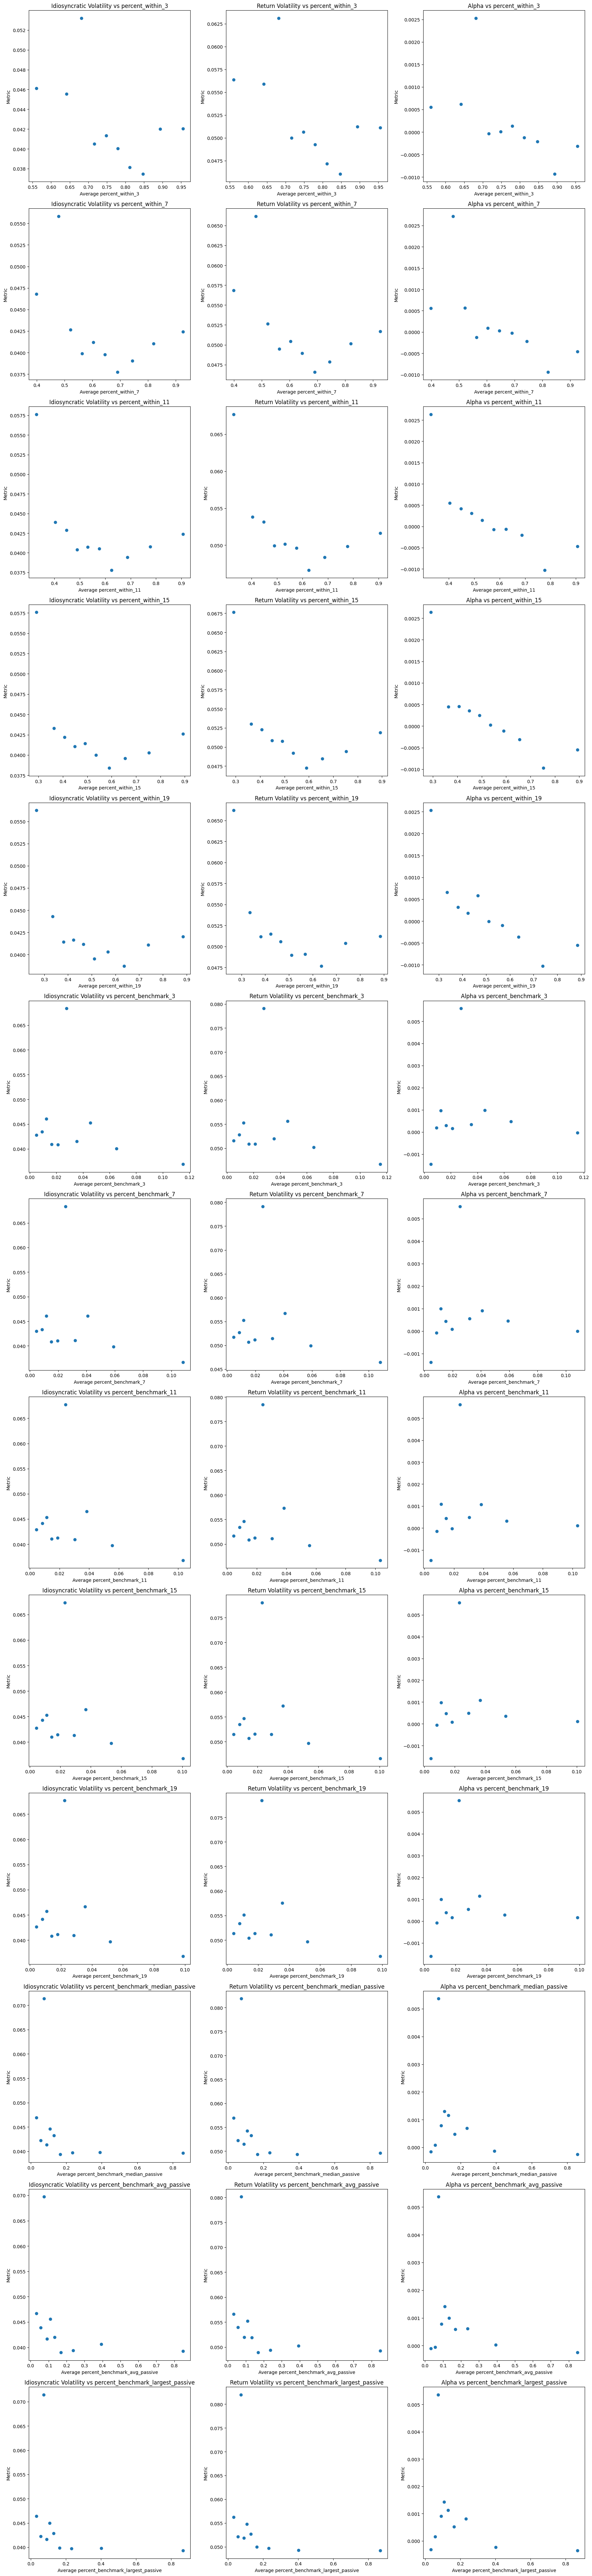

In [27]:
# List all sparsity and benchmark measures you want to analyze
measures = [
    'percent_within_3', 'percent_within_7', 'percent_within_11', 'percent_within_15', 'percent_within_19',
    'percent_benchmark_3', 'percent_benchmark_7', 'percent_benchmark_11', 'percent_benchmark_15', 'percent_benchmark_19',
    'percent_benchmark_median_passive', 'percent_benchmark_avg_passive', 'percent_benchmark_largest_passive'
]

# Prepare results containers
all_results = {}

# Loop through each measure
for measure in measures:
    results = {}

    # Loop through each fund based on 'wficn'
    for fund in tqdm(monthly_ret_si_3yr['wficn'].unique(), desc=f'Processing {measure}'):
        fund_data = monthly_ret_si_3yr[monthly_ret_si_3yr['wficn'] == fund]

        # Run regression
        X = fund_data[['Mkt-RF', 'SMB', 'HML']]
        X = sm.add_constant(X)  # Adds a constant term to the predictor
        y = fund_data['mret']
        model = OLS(y, X, missing='drop').fit()

        # Store results
        results[fund] = {
            'alpha': model.params['const'],
            'beta_1': model.params['Mkt-RF'],
            'beta_2': model.params['SMB'],
            'beta_3': model.params['HML'],
            'alpha_tstat': model.tvalues['const'],
            'beta_1_tstat': model.tvalues['Mkt-RF'],
            'beta_2_tstat': model.tvalues['SMB'],
            'beta_3_tstat': model.tvalues['HML'],
            'return_vol': np.std(y),
            'idiosyncratic_vol': np.std(model.resid),
            'average_measure': fund_data[measure].mean()
        }

    # Convert results to DataFrame and store in all_results dictionary under the current measure
    all_results[measure] = pd.DataFrame(results).T

# Define a function for creating bin-scatter plots
def bin_scatter(x, y, ax, bins=10):
    df = pd.DataFrame({'x': x, 'y': y})
    df['bins'] = pd.qcut(df['x'], bins, duplicates='drop')
    bin_centers = df.groupby('bins')['x'].mean()
    bin_means = df.groupby('bins')['y'].mean()
    ax.scatter(bin_centers, bin_means)

# Plot bin-scatter plots for all measures
num_measures = len(measures)
fig, axs = plt.subplots(num_measures, 3, figsize=(18, 6 * num_measures))

for i, measure in enumerate(measures):
    results_df = all_results[measure]
    bin_scatter(results_df['average_measure'], results_df['idiosyncratic_vol'], axs[i, 0])
    bin_scatter(results_df['average_measure'], results_df['return_vol'], axs[i, 1])
    bin_scatter(results_df['average_measure'], results_df['alpha'], axs[i, 2])

    axs[i, 0].set_title(f'Idiosyncratic Volatility vs {measure}')
    axs[i, 1].set_title(f'Return Volatility vs {measure}')
    axs[i, 2].set_title(f'Alpha vs {measure}')

    for ax in axs[i]:
        ax.set_xlabel(f'Average {measure}')
        ax.set_ylabel('Metric')

plt.tight_layout()
plt.show()